In [12]:
# First import some necessary libararies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(precision = 3)

heart_dataset = '../Unsupervised Learning/mads_SAHeart.csv'
beer_dataset  = '../Unsupervised Learning/beer2.csv'

In [13]:
df = pd.read_csv(beer_dataset)
df = df.dropna()
df.head()

,beer_index,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
0,0,7.0,2511,287,Bell's Cherry Stout,American Stout,4.5,4.0,4.5,4.0,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,10/5/2009 21:31
1,1,5.7,19736,9790,Duck-Rabbit Porter,American Porter,4.5,4.0,4.5,4.0,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,10/5/2009 21:32
2,2,4.8,11098,3182,Fürstenberg Premium Pilsener,German Pilsener,4.0,3.0,3.0,3.0,biegaman,3.5,Haystack yellow with an energetic group of bu...,10/5/2009 21:32
3,3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.0,4.0,4.0,4.0,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",10/5/2009 21:32
4,4,5.8,398,119,Wolaver's Pale Ale,American Pale Ale (APA),4.0,3.0,4.0,3.5,champ103,3.0,A: Pours a slightly hazy golden/orange color....,10/5/2009 21:33


In [14]:
from sklearn.preprocessing import StandardScaler

feature_names = ['beer_name', 'review_appearance', 'review_aroma', 'review_palate', 'review_taste', 'review_overall']


def fit_scaler():
    scaler = StandardScaler()
    df_new = df[feature_names]
    df_new = df_new.groupby(df_new['beer_name']).mean()
    result = scaler.fit_transform(df_new)

    return result

In [15]:
def highest_rated():
    
    df_new = df[feature_names]
    df_new = df_new.groupby(df_new['beer_name']).mean()
    df_new.reset_index(inplace = True)
    index = np.lexsort((df_new['beer_name'],-df_new['review_overall']))[:10]
    result = np.array(df_new.iloc[index,0])
    
    return result
highest_rated()

array(['A Fortnights Journey',
       'Abbaye De Saint Bon-Chien Grand Cru (Aged In Cabernet Barrels)',
       'Aecht Schlenkerla Eiche', 'AleSmith Speedway Stout - Oak Aged',
       'Andechser Bergbock Hell', 'Apollo', 'Aud Blonde',
       'Augustiner Bräu Märzen Bier',
       "Bell's Bourbon Barrel Aged Double Cream Stout",
       'Belle Vue Sélection Lambic'], dtype=object)

In [16]:
from sklearn.decomposition import PCA

def fit_pca():
    pca = PCA(n_components=3, random_state = 0)

    result = pca.fit(fit_scaler())

    
    return result

In [17]:
def variance_pc():
    result = np.linalg.svd(fit_scaler())[1][:3]**2/(fit_scaler().shape[0]-1)    
    return result
variance_pc()

array([3.835, 0.486, 0.311])

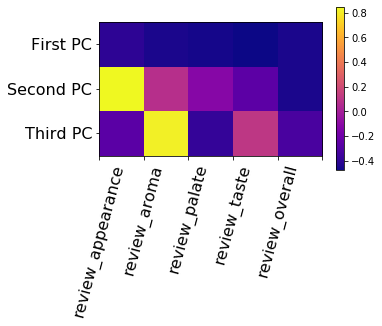

In [18]:
def plot_pca_heatmap(pca, feature_names):
    pc_names = ['First PC', 'Second PC', 'Third PC']
    fig, ax = plt.subplots(figsize=(5, 3))
    plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
    feature_names=list(feature_names)
    plt.xticks(np.arange(-0.5, 5, 1) , feature_names[0:5], rotation = 75, fontsize=16)
    plt.yticks(np.arange(0.0, 3, 1), pc_names, fontsize = 16)
    plt.colorbar()

pca = fit_pca()
plot_pca_heatmap(pca, feature_names[1:])

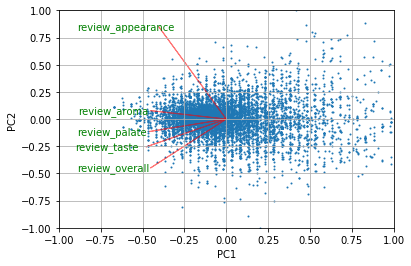

In [19]:
## Routine to generate a high-quality biplot
def biplot(score, coeff, maxdim, pcax, pcay, labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n = min(coeff.shape[0], maxdim)
    scalex = 2.0/(xs.max()- xs.min())
    scaley = 2.0/(ys.max()- ys.min())
    text_scale_factor = 1.5
    plt.scatter(xs*scalex, ys*scaley, s=1)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* text_scale_factor, coeff[i,pca2] * text_scale_factor, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* text_scale_factor, coeff[i,pca2], labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

plt.figure()

# Uncomment this code to generate the biplot using your previous answers
X_beer_normalized = fit_scaler()
pca = fit_pca()
X_beer_pca = pca.transform(X_beer_normalized)
biplot(X_beer_pca, np.transpose(pca.components_[0:2, :]), 5, 1, 2, labels=feature_names[1:])

In [20]:
# plot a labelled scatterplot
def scatter_text(x, y, text_column, color=None):
    
    fig = plt.gcf()
    fig.set_size_inches(9, 9)
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, size = 32, legend=False)
    
    # Add text besides each point
    for line in range(0,x.shape[0]):
         p1.text(x[line], y[line], 
                 text_column[line], 
                 horizontalalignment='left', 
                 size='medium', color=color, weight='semibold')
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

# randomly jitter the input points 
def rand_jitter(arr):
    stdev = .03*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


# Given a reference vector of feature values, compares the given outlier vector
# against the corresponding reference values and prints a summary of any differences.

def interpret_component(reference, outlier, label, name, index):
    epsilon = 0.5
    if (outlier[index] > reference[index] + epsilon):
        print("{} has a much higher {} rating ({:2f}).".format(label,name, outlier[index]))
    else:
        if (outlier[index] < reference[index] - epsilon):
            print("{} has a much lower {} rating ({:2f}).".format(label,name, outlier[index]))

def print_outlier_interpretation(reference, outlier, label):
    #'review_appearance', 'review_aroma', 'review_palate', 'review_taste', 'review_overall']
    interpret_component(reference, outlier, label, "appearance", 0)
    interpret_component(reference, outlier, label, "aroma", 1)
    interpret_component(reference, outlier, label, "palate", 2)
    interpret_component(reference, outlier, label, "taste", 3)
    interpret_component(reference, outlier, label, "overall", 4)

def compute_outlier_component_label(reference, outlier, index, base_label):
    epsilon = 0.5
    if (outlier[index] > reference[index] + epsilon):
        return "+{} ".format(base_label)
    if (outlier[index] < reference[index] - epsilon):
        return "-{} ".format(base_label)
    return ""
    
def compute_outlier_label(reference, outlier):
    epsilon = 0.5
    label = ""
    label = label + compute_outlier_component_label(reference, outlier, 0, "appearance")
    label = label + compute_outlier_component_label(reference, outlier, 1, "aroma")
    label = label + compute_outlier_component_label(reference, outlier, 2, "palate")
    label = label + compute_outlier_component_label(reference, outlier, 3, "taste")
    label = label + compute_outlier_component_label(reference, outlier, 4, "overall") 
    if (label == ""):
        label = "average"
    return label

In [21]:
def answer_outlier_b():
    from sklearn.neighbors import LocalOutlierFactor
    X = answer_outlier_a().fit_transform(answer_pca_a()[:200,:])
    clf = LocalOutlierFactor(n_neighbors=10)
    clf.fit_predict(X)
    matrix = clf.negative_outlier_factor_
    lst = matrix.copy()
    lst.sort()
    lst = lst[:20][::-1]
    
    result=[]
    for i in lst:
        index = np.argwhere(matrix == i)
        result = np.append(result,index)
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return result.astype(int)

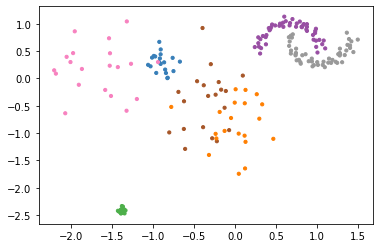

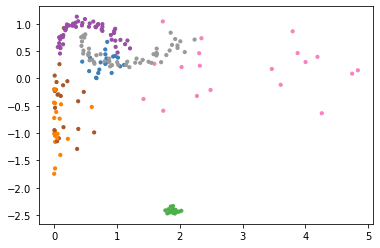

In [22]:
from sklearn import cluster, datasets
from itertools import cycle, islice
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# The goal of this routine is to create a dataset with
# a variety of clusters with very different properties:
# small and dense, large and sparse, crescent-derived, etc.
def create_complex_labeled_clusters():

    n_samples = 100
    random_state = 42

    # blobs with varied variances
    X_blobs, y_blobs = datasets.make_blobs(n_samples=n_samples, 
                                       centers = 5, n_features = 2,
                                       cluster_std=[1.0, 2.5, 0.2, 3.0, 3.0],
                                       random_state=random_state)


    X_moons, y_moons = datasets.make_moons(n_samples = 100, 
                                       noise = 0.1, random_state = random_state)
    X_moons = X_moons * 3 + [10, 10]
    y_moons = y_moons + 5

    X_raw = np.vstack((X_blobs, X_moons))
    y     = np.append(y_blobs, y_moons)

    X_scaled = StandardScaler().fit(X_raw).transform(X_raw) 

    # now expand to a higher-dimensional space with a non-linear transformation just for good measure
    poly = PolynomialFeatures(3, include_bias = False)

    X = poly.fit_transform(X_scaled)
    
    return(X, y)

X, y = create_complex_labeled_clusters()

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))

# one view
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
plt.show()

# another view
plt.scatter(X[:, 2], X[:, 1], s=10, color=colors[y])
plt.show()

In [30]:
def kde_a():
    df = pd.read_csv('../Unsupervised Learning/mads_SAHeart.csv')
    X_sbp_chd = df['sbp'].where(df['chd'] == 1).dropna()
    X_sbp_nochd = df['sbp'].where(df['chd'] == 0).dropna()
    result = np.array(X_sbp_chd).reshape(-1, 1), np.array(X_sbp_nochd).reshape(-1, 1)

    
    return result

In [31]:
def kde_b():
    x = np.linspace(100,220, 400).reshape(-1, 1)
    
    from sklearn.neighbors import KernelDensity
    kde_CHD = KernelDensity(kernel='gaussian', bandwidth=5).fit(kde_a()[0])
    kde_NCHD = KernelDensity(kernel='gaussian', bandwidth=5).fit(kde_a()[1])
    
    result = kde_CHD.score_samples(x), kde_NCHD.score_samples(x)

    
    return result

In [32]:
def plot_densities(X_plot, class1, class2):
    plt.clf()
    plt.plot(X_plot, class1, color = 'g', label = 'No CHD')
    plt.plot(X_plot, class2, color="r", label = 'CHD')
    plt.title('Density Plot of Systolic Blood Pressure')
    plt.xlabel('Systolic Pressure')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

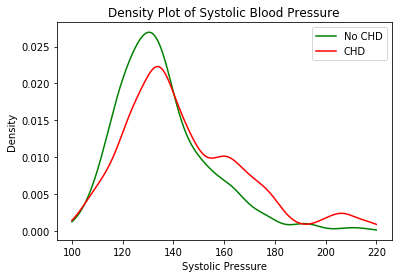

In [33]:
X_plot = np.linspace(100, 220, num=400)
(log_dens_chd, log_dens_nochd) = kde_b()
plot_densities(X_plot, np.exp(log_dens_nochd), np.exp(log_dens_chd))

In [34]:
def get_chd_test_data():
    # column 0 is 'sbp' feature, column 1 is CHD label (=1 if CHD, else 0)
    result = np.array([[200, 1], [169, 1], [120, 0], [135, 1], [142, 0], [143, 1], [150, 1], [162, 1], [100, 0], [112, 0]])
    return result

In [37]:
def kde_c():
    X_test = get_chd_test_data()[:,:1]
    y_test = get_chd_test_data()[:,1:2]
    from sklearn.neighbors import KernelDensity
    from sklearn.metrics import accuracy_score
    kde_CHD = KernelDensity(kernel='gaussian', bandwidth=5).fit(kde_a()[0])
    kde_NCHD = KernelDensity(kernel='gaussian', bandwidth=5).fit(kde_a()[1])
    p = np.log(0.5)
    lst =[]
    for i in X_test:
    #print(i.shape)
        a = kde_CHD.score_samples(i.reshape(1,-1))
        b = kde_NCHD.score_samples(i.reshape(1,-1))
        a = np.exp(a + p)
        b = np.exp(b + p)
        if a > b:
            lst.append(1)
        else:
            lst.append(0)
    result = accuracy_score(y_test, lst)

    
    return result

In [38]:
kde_c()

0.7